#Целые числа

In [ ]:
nums = [7, 4, 4, 1, 8, 5, 6, 0, 8, 6, 3, 8, 7, 5, 7, 1]

In [ ]:
x = list(set(nums))
print(x)
n = [nums.count(val) for val in x]
print(n)
w = [val/len(nums) for val in n]
print(w)

[0, 1, 3, 4, 5, 6, 7, 8]
[1, 2, 1, 2, 2, 2, 3, 3]
[0.0625, 0.125, 0.0625, 0.125, 0.125, 0.125, 0.1875, 0.1875]


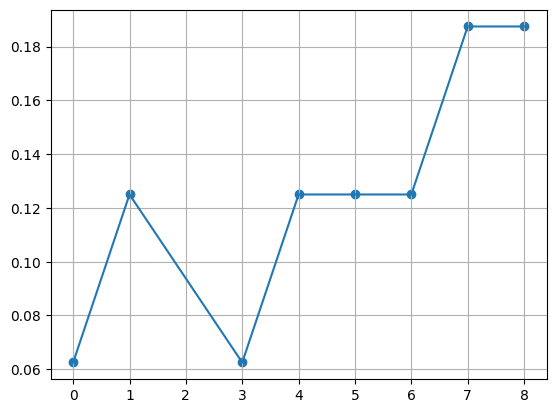

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(list(x), list(w))
plt.plot(list(x), list(w))
plt.grid()
plt.show()

In [ ]:
f = [0]
for i in range(len(w)):
  f.append(f[i] + w[i])
print(f)

[0, 0.0625, 0.1875, 0.25, 0.375, 0.5, 0.625, 0.8125, 1.0]


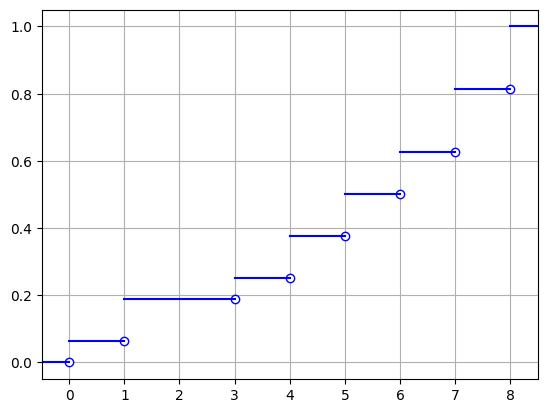

In [ ]:
import numpy as np
x_f = [-1] + x + [9]
plt.plot(x + [9], f, 'wo', mec = 'b')
for i in range(len(f)):
    plt.plot([x_f[i], x_f[i+1]],[f[i], f[i]], color = 'blue')

plt.grid()
plt.xlim(-0.5,8.5)
plt.show()

In [ ]:
x_mean = np.sum(x) / len(x)

s = 0
for xi in x:
  s += (xi - x_mean)**2
D = s / len(x)

dx = D ** 0.5

mediana = (x[len(x)//2 - 1] + x[len(x)//2])/2

v = dx / x_mean

print('Выборочное среднее: ', x_mean)
print('Выборочная дисперсия: ', D)
print('Выборочное стандартное отклонение ', dx)
print('Выборочная медиана: ', mediana)
print('Коэффициент вариации: ', v)

Выборочное среднее:  4.25
Выборочная дисперсия:  6.9375
Выборочное стандартное отклонение  2.6339134382131846
Выборочная медиана:  4.5
Коэффициент вариации:  0.6197443384031023


#Вещественные числа


In [ ]:
height = [182.5, 185, 178, 166, 188, 168, 170, 177, 187,
          190, 182, 168, 183, 183, 185, 163, 190, 180,
          170, 187, 154, 177, 183, 181.9, 193, 180, 172,
          172, 183, 161, 179]

In [ ]:
import math
height.sort()
# Рассчитать число групп (интервалов) m для квантования исходных данных по правилу Стёрджесса
m = round(1 + math.log(len(height), 2))
print(m)


6


In [ ]:
# Вычислить значения m+1 границ групп для значений выборки по правилу фиксированной величины интервала
h = (height[-1] - height[0]) / m
print(h)

6.5


In [ ]:
bins = []
bins.append(round(height[0] - h/2, 2))
for i in range(m + 1):
  bins.append(round(bins[i] + h, 2))
print(bins)

[150.75, 157.25, 163.75, 170.25, 176.75, 183.25, 189.75, 196.25]


In [ ]:
# Построить вариационный ряд для выборки интервальных данных
i = 0
ni = []
wi = []
k = 0
for num in height:
  if num >= bins[i] and num < bins[i + 1]:
    k += 1
  else:
    ni.append(k)
    wi.append(round(k / len(height), 2))
    k = 1
    i += 1
if k > 0:
  ni.append(k)
  wi.append(round(k / len(height), 2))
print(bins)
print(ni)
print(wi)

[150.75, 157.25, 163.75, 170.25, 176.75, 183.25, 189.75, 196.25]
[1, 2, 5, 2, 13, 5, 3]
[0.03, 0.06, 0.16, 0.06, 0.42, 0.16, 0.1]


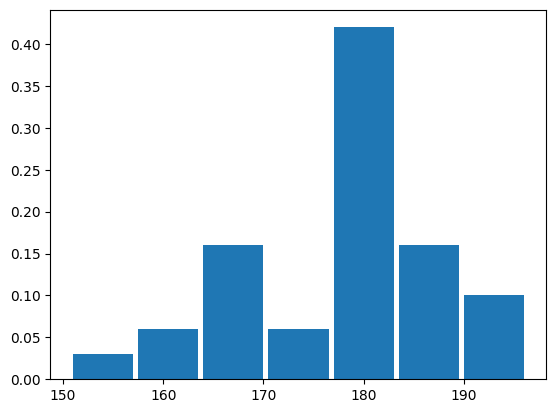

In [ ]:
# Построить гистограмму распределения относительных частот для рассчитанных интервалов выборки
import numpy as np
import matplotlib.pyplot as plt

plt.bar([(bins[i] + bins[i + 1]) / 2 for i in range(len(wi))], wi, width = 6)

plt.show()

In [ ]:
# Выписать выражение для эмпирической функции распределения, построить её график
f = [0]
for i in range(len(wi)):
  f.append(f[i] + wi[i])
print(f)

[0, 0.03, 0.09, 0.25, 0.31, 0.73, 0.89, 0.99]


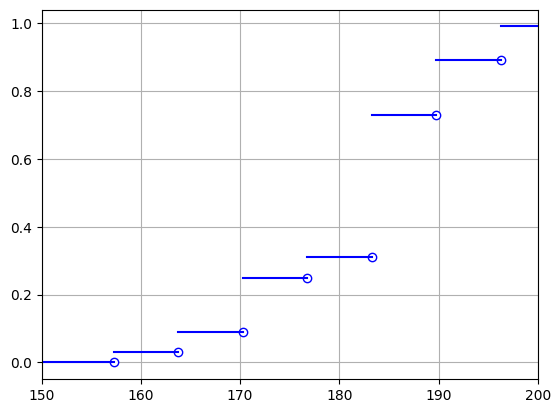

In [ ]:
bins_f = [150] + bins[1:] + [201]
plt.plot(bins[1:] + [201], f, 'wo', mec = 'b')
for i in range(len(f)):
    plt.plot([bins_f[i], bins_f[i + 1]],[f[i], f[i]], color = 'blue')

plt.grid()
plt.xlim(150,200)
plt.show()

In [ ]:
x_mean_h = sum(height) / len(height)

s = 0
for xi in height:
  s += (xi - x_mean_h)**2
D_h = s / len(height)

dx_h = D_h ** 0.5

mediana_h =  bins[4] + (0.5 * len(height) - sum(ni[:4])) / ni[4] * h

v_h = dx_h / x_mean_h

print('Выборочное среднее: ', round(x_mean_h, 2))
print('Выборочная дисперсия: ', round(D_h, 2))
print('Выборочное стандартное отклонение ', round(dx_h, 2))
print('Выборочная медиана: ', round(mediana_h, 2))
print('Коэффициент вариации: ', round(v_h, 2))

Выборочное среднее:  178.01
Выборочная дисперсия:  86.11
Выборочное стандартное отклонение  9.28
Выборочная медиана:  179.5
Коэффициент вариации:  0.05
